# Multi-variate Linear Regression Example

## Programming Lab: 041_01 Gradient Descent Method

이번 실습에서는 기본적인 NumPy와 Matplotlib의 사용법을 익히고, Gradient Descent Method을 이용하여 predictor를 학습시켜 봅니다.

실습은 다음과 같은 단계로 이루어집니다.

<ul>
    <li> Step.1 Data Samples </li>    
    교재의 학습 데이터를 입력합니다.
    <li> Step.2 Gradient Descent Method (1) : Batch Gradient Descent</li>
    cost function에 대해 GDM을 이용하여 predictor를 학습시킵니다.
    <li> Step.2 Gradient Descent Method (2) : Stochastic Gradient Descent (SGD)</li>
    loss function에 대해 GDM을 이용하여 predictor를 학습시킵니다.
</ul>

먼저 다음 셀을 실행시켜 필요한 library들을 import하세요.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl

plt.style.use('seaborn')
np.random.seed(0)

## Step.1 Input dataset

***
### Data Samples

linear regression model을 학습시키기 위한 dataset을 먼저 입력합니다. dataset은

(x1, x2, y) = (2, 0, 81), (4, 4, 93), (6, 2, 91), (8, 3, 97)

***
**Programming**

이번 실습에서는 교재에서 사용한 4개의 data sample들을 Numpy array로 입력합니다.

(Hint.1) data를 2차원 리스트로 생성

In [3]:
##### Start Your Code(Dataset Generation) #####
data = [[2, 0, 81], [4, 4, 93], [6, 2, 91], [8, 3, 97]]
##### End Your Code(Dataset Generation) #####

# Convert to Numpy Array
x1_data = np.array([i[0] for i in data])
x2_data = np.array([i[1] for i in data])
y_data = np.array([i[2] for i in data])

%matplotlib qt

# Dataset Visualization
ax = plt.axes(projection='3d')
ax.set_xlabel('study_hours')
ax.set_ylabel('private_class')
ax.set_zlabel('Score')
ax.dist = 11 
ax.scatter(x1_data, x2_data, y_data)

**Expected Output**  
<img src="./imgs/01_01.png">

## Step.2 Gradient Descent Method (1) : Batch Gradient Descent

위의 dataset에 따라 predictor는
$$ \hat{y} = w_{1}x_{1} + w_{2}x_{2} + b$$
로 설정할 수 있습니다.

그리고 dataset에 대한 cost($\mathcal{J}$)는 
$$ \mathcal{J} = \frac{1}{2n} \sum_{i=1}^N (\hat{y}^{(i)} - y^{(i)})^{2} = \frac{1}{2n} \sum_{i=1}^N  ((w_{1}x_{1}^{(i)}+w_{2}x_{2}^{(i)}+b) - y^{(i)})^{2}$$
로 정의됩니다.

따라서 $w_{1}, w_{2}, b$에 대한 $\mathcal{J}$의 partial derivative는
$$ \frac{\partial \mathcal{J}}{\partial w_{1}} = \frac{1}{n} \sum_{i=1}^N ((w_{1}x_{1}^{(i)}+w_{2}x_{2}^{(i)}+b) - y^{(i)})x_{1}^{(i)}$$
$$ \frac{\partial \mathcal{J}}{\partial w_{2}} = \frac{1}{n} \sum_{i=1}^N ((w_{1}x_{1}^{(i)}+w_{2}x_{2}^{(i)}+b) - y^{(i)})x_{2}^{(i)}$$
$$ \frac{\partial \mathcal{J}}{\partial b} = \frac{1}{n} \sum_{i=1}^N ((w_{1}x_{1}^{(i)}+w_{2}x_{2}^{(i)}+b) - y^{(i)})$$
입니다.

마지막으로 이를 이용한 Gradient descent method는

$$ w_{1} := w_{1} - \alpha \frac{\partial \mathcal{L}^{(i)}}{\partial w_{1}} = w_{1} - \alpha \frac{1}{n} \sum_{i=1}^N (\hat{y}^{(i)} - y^{(i)}) x_{1}^{(i)}$$
$$ w_{2} := w_{2} - \alpha \frac{\partial \mathcal{L}^{(i)}}{\partial w_{2}} = w_{2} - \alpha \frac{1}{n} \sum_{i=1}^N (\hat{y}^{(i)} - y^{(i)}) x_{2}^{(i)}$$
$$ b := b - \alpha \frac{\partial \mathcal{L}^{(i)}}{\partial b} = b - \alpha \frac{1}{n} \sum_{i=1}^N (\hat{y}^{(i)} - y^{(i)})$$
입니다.

***
**Programming**

초기 $w_{1}, w_{1}, b$는 각 0.0, 0.0, 0.0 그리고 학습률(learning rate) $lr$은 0.05, 총 세대(epoch) $epochs$는 2001으로 설정하고 gradient descent method를 이용하여 optimal $w$와 $b$에 대한 approximation을 진행하세요.

(Hint.1) $w$의 변화와 loss를 추적하기 위하여 빈 리스트 <i>w1_list, w2_list, loss_list</i>를 각각 만들어줍니다.  
(Hint.2) 오차와 data sample 값의 곱에 대한 평균을 계산하여 w_diff 변수에 저장합니다.  
(Hint.3) 오차에 대한 평균을 계산하여 b_diff 변수에 저장합니다.  
(Hint.4) $w_{1}, w_{2}, b$에 대한 gradient descent를 수행합니다.

epoch=0, w1=23.2000, w2=10.5625, b=4.5250
epoch=500, w1=1.7042, w2=2.3562, b=76.4554
epoch=1000, w1=1.5038, w2=2.2870, b=77.8310
epoch=1500, w1=1.5001, w2=2.2857, b=77.8567
epoch=2000, w1=1.5000, w2=2.2857, b=77.8571


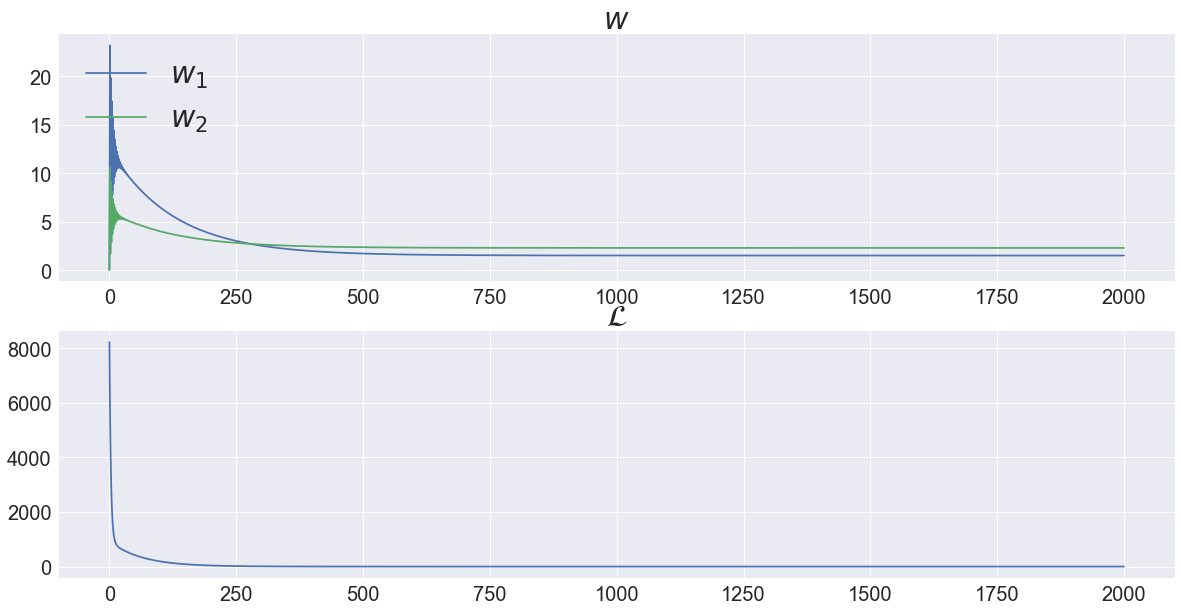

In [5]:
%matplotlib inline

##### Start Your Code(Learning Preparation) #####
w1 = 0.0
w2 = 0.0
b = 0.0
lr = 0.05
epochs = 2001
##### End Your Code(Learning Preparation) #####

w1_list = []
w2_list = []
loss_list = []

for epoch in range(epochs):
    ##### Start Your Code(Loss Calculation) #####
    pred = w1*x1_data + w2*x2_data + b
    loss = (pred - y_data) ** 2
    ##### End Your Code(Loss Calculation) #####

    w1_list.append(w1)
    w2_list.append(w2)
    loss_list.append(np.mean(loss))

    ##### Start Your Code(Gradient Calculation) #####
    w1_diff = np.mean((pred-y_data)*x1_data)
    w2_diff = np.mean((pred-y_data)*x2_data)
    b_diff = np.mean(pred-y_data)
    ##### End Your Code(Gradient Descent Method) #####

    ##### Start Your Code(Gradient Descent Method) #####
    w1 = w1 - lr*w1_diff
    w2 = w2 - lr*w2_diff
    b = b - lr*b_diff
    ##### End Your Code(Gradient Descent Method) #####

    if epoch % 500 == 0:
        print("epoch=%d, w1=%.04f, w2=%.04f, b=%.04f" % (epoch, w1, w2, b))

fig, ax = plt.subplots(2, 1, figsize = (20,10))
ax[0].plot(w1_list, label = r'$w_{1}$')
ax[0].plot(w2_list, label = r'$w_{2}$')
ax[0].legend(loc = 'upper left', fontsize = 30)
ax[1].plot(loss_list)
ax[0].set_title(r'$w$', fontsize = 30)
ax[1].set_title(r'$\mathcal{L}$', fontsize = 30)
for ax_idx in range(2):
    ax[ax_idx].tick_params(axis = 'both', labelsize = 20)

**Expected Output**  
epoch=0, w1=23.2000, w2=10.5625, b=4.5250  
epoch=500, w1=1.7042, w2=2.3562, b=76.4554  
epoch=1000, w1=1.5038, w2=2.2870, b=77.8310  
epoch=1500, w1=1.5001, w2=2.2857, b=77.8567  
epoch=2000, w1=1.5000, w2=2.2857, b=77.8571  
<img src="./imgs/01_02.png">

이전 단계에서 구한 최적의 $w, b$를 사용하여 target function에 대한 그래프와 입력 데이터를 중첩하여 표시합니다.

In [9]:
%matplotlib qt

print("w1=%.04f, w2=%.04f, b=%.04f" % (w1, w2, b))

X1, X2 = np.meshgrid(np.linspace(min(x1_data), max(x1_data),100),
                   np.linspace(min(x2_data), max(x2_data),100))

ax = plt.axes(projection='3d')
ax.set_xlabel('study_hours')
ax.set_ylabel('private_class')
ax.set_zlabel('Score')
ax.dist = 11 
ax.scatter(x1_data, x2_data, y_data)

z = X1*w1 + X2*w2 + b
ax.plot_surface(X1, X2, z, rstride=1, cstride=1, color='none', alpha=0.4)
fake2Dline = mpl.lines.Line2D([0],[0], linestyle="none", c='g', marker = '.')
ax.legend([fake2Dline], [r'$y = $' + str(round(w1, 2)) + r'$x_{1}$ + ' + str(round(w2, 2)) + r'$x_{2}$ + ' + str(round(b, 2))], numpoints = 1, fontsize=20)

w1=1.5000, w2=2.2857, b=77.8571


**Expected Output**  
w1=1.5000, w2=2.2857, b=77.8571  
<img src="./imgs/01_03.png">

### Step.3 Gradient Descent Method (2) : Stochastic Gradient Descent (SGD)

위의 dataset에 따라 predictor는
$$ \hat{y} = w_{1}x_{1} + w_{2}x_{2} + b$$
로 설정할 수 있습니다.

그리고 <i>i</i>번째 data sample에 대한 loss($\mathcal{L}^{(i)}$)는 
$$ \mathcal{L}^{(i)} = (\hat{y}^{(i)} - y^{(i)})^{2} = ((w_{1}x_{1}^{(i)}+w_{2}x_{2}^{(i)}+b) - y^{(i)})^{2}$$
로 정의됩니다.

따라서 $w_{1}, w_{2}, b$에 대한 $\mathcal{L}^{(i)}$의 partial derivative는
$$ \frac{\partial \mathcal{L}^{(i)}}{\partial w_{1}} = 2(\hat{y}^{(i)} - y^{(i)})x_{1}^{(i)}$$
$$ \frac{\partial \mathcal{L}^{(i)}}{\partial w_{2}} = 2(\hat{y}^{(i)} - y^{(i)})x_{2}^{(i)}$$
$$ \frac{\partial \mathcal{L}^{(i)}}{\partial b} = 2(\hat{y}^{(i)} - y^{(i)})$$
입니다.

마지막으로 이를 이용한 Gradient descent method는

$$ w_{1} := w_{1} - \alpha \frac{\partial \mathcal{L}^{(i)}}{\partial w_{1}} = w_{1} - 2\alpha (\hat{y}^{(i)} - y^{(i)}) x_{1}^{(i)}$$
$$ w_{2} := w_{2} - \alpha \frac{\partial \mathcal{L}^{(i)}}{\partial w_{2}} = w_{2} - 2\alpha (\hat{y}^{(i)} - y^{(i)}) x_{2}^{(i)}$$
$$ b := b - \alpha \frac{\partial \mathcal{L}^{(i)}}{\partial b} = b - 2\alpha (\hat{y}^{(i)} - y^{(i)})$$
입니다.

***
**Programming**

초기 $w_{1}, w_{2}, b$는 각 0.0, 0.0, 0.0 그리고 학습률(learning rate) $lr$은 0.01, 총 세대(epoch) $epochs$는 2001으로 설정하고 gradient descent method를 이용하여 optimal $w_{1}, w_{2}$와 $b$에 대한 approximation을 진행하세요.

(Hint.1) $w$의 변화와 loss를 추적하기 위하여 빈 리스트 <i>w1_list, w2_list, loss_list</i>를 각각 만들어줍니다.  
(Hint.2) 각 data sample에 대해 w에 대한 손실 함수의 편미분값을 w_diff 변수에 저장합니다.  
(Hint.3) 각 data sample에 대해 b에 대한 손실 함수의 편미분값을 b_diff 변수에 저장합니다.  
(Hint.4) w와 b에 대한 gradient descent를 수행합니다.

epoch=0, w1=3.2400, w2=0.0000, b=1.6200
epoch=500, w1=1.6524, w2=2.2403, b=77.4202
epoch=1000, w1=1.6484, w2=2.2374, b=77.4566
epoch=1500, w1=1.6484, w2=2.2374, b=77.4566
epoch=2000, w1=1.6484, w2=2.2374, b=77.4566


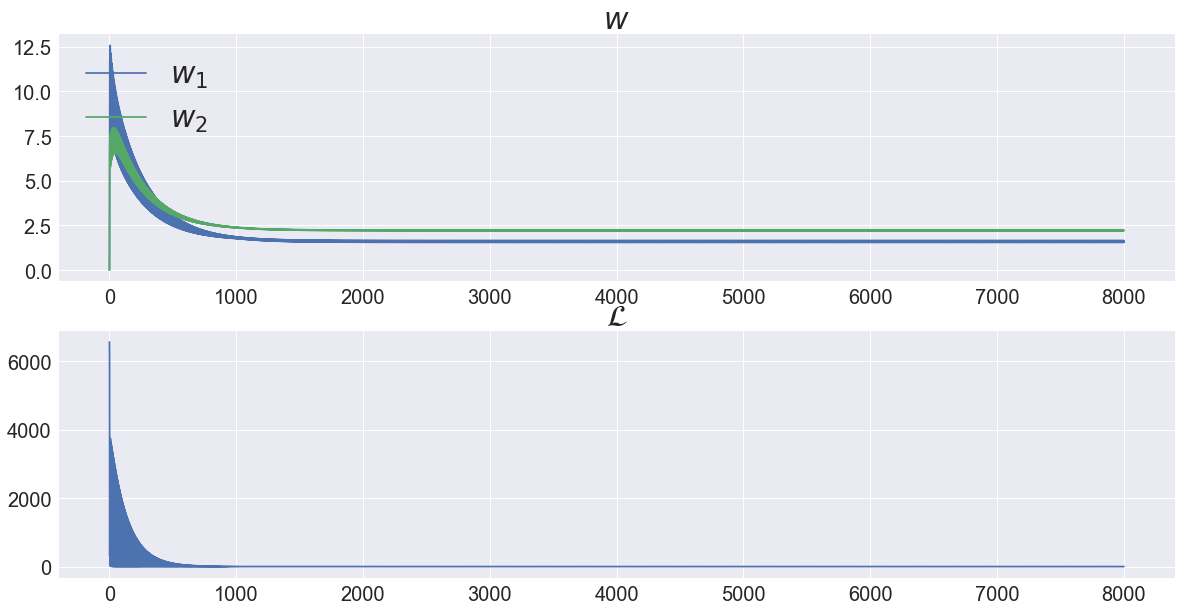

In [11]:
%matplotlib inline

##### Start Your Code(Learning Preparation) #####
w1 = 0.0
w2 = 0.0
b = 0.0
lr = 0.01
epochs = 2001
##### End Your Code(Learning Preparation) #####

w1_list = []
w2_list = []
loss_list = []

for epoch in range(epochs):
    for data_idx, (v1, v2, v) in enumerate(zip(x1_data, x2_data, y_data)):
        ##### Start Your Code(Loss Calculation) #####
        pred = w1*v1 + w2*v2 + b
        loss = (pred - v) ** 2
        ##### End Your Code(Loss Calculation) #####

        w1_list.append(w1)
        w2_list.append(w2)
        loss_list.append(loss)
        
        ##### Start Your Code(Gradient Calculation) #####
        w1_diff = 2*(pred - v)*v1
        w2_diff = 2*(pred - v)*v2
        b_diff = 2*(pred - v)
        ##### End Your Code(Gradient Descent Method) #####

        ##### Start Your Code(Gradient Descent Method) #####
        w1 = w1 - lr*w1_diff
        w2 = w2 - lr*w2_diff
        b = b - lr*b_diff
        ##### End Your Code(Gradient Descent Method) #####

        if (epoch % 500 == 0) and (data_idx == 0):
            print("epoch=%d, w1=%.04f, w2=%.04f, b=%.04f" % (epoch, w1, w2, b))
        
fig, ax = plt.subplots(2, 1, figsize = (20,10))
ax[0].plot(w1_list, label = r'$w_{1}$')
ax[0].plot(w2_list, label = r'$w_{2}$')
ax[0].legend(loc = 'upper left', fontsize = 30)
ax[1].plot(loss_list)
ax[0].set_title(r'$w$', fontsize = 30)
ax[1].set_title(r'$\mathcal{L}$', fontsize = 30)
for ax_idx in range(2):
    ax[ax_idx].tick_params(axis = 'both', labelsize = 20)

**Expected Output**  
epoch=0, w1=3.2400, w2=0.0000, b=1.6200  
epoch=500, w1=1.6524, w2=2.2403, b=77.4202  
epoch=1000, w1=1.6484, w2=2.2374, b=77.4566  
epoch=1500, w1=1.6484, w2=2.2374, b=77.4566  
epoch=2000, w1=1.6484, w2=2.2374, b=77.4566  
<img src="./imgs/01_04.png">

이전 단계에서 구한 최적의 $w, b$를 사용하여 target function에 대한 그래프와 입력 데이터를 중첩하여 표시합니다.

In [12]:
%matplotlib qt

print("w1=%.04f, w2=%.04f, b=%.04f" % (w1, w2, b))

X1, X2 = np.meshgrid(np.linspace(min(x1_data), max(x1_data),100),
                   np.linspace(min(x2_data), max(x2_data),100))

ax = plt.axes(projection='3d')
ax.set_xlabel('study_hours')
ax.set_ylabel('private_class')
ax.set_zlabel('Score')
ax.dist = 11 
ax.scatter(x1_data, x2_data, y_data)

z = X1*w1 + X2*w2 + b
ax.plot_surface(X1, X2, z, rstride=1, cstride=1, color='none', alpha=0.4)
fake2Dline = mpl.lines.Line2D([0],[0], linestyle="none", c='g', marker = '.')
ax.legend([fake2Dline], [r'$y = $' + str(round(w1, 2)) + r'$x_{1}$ + ' + str(round(w2, 2)) + r'$x_{2}$ + ' + str(round(b, 2))], numpoints = 1, fontsize=20)

w1=1.6374, w2=2.2374, b=77.4511


**Expected Output**  
w1=1.6374, w2=2.2374, b=77.4511  
<img src="./imgs/01_05.png">